In [1]:
!pip install wfdb

In [2]:
!pip install pyts

In [3]:
import pyts
print(pyts.__version__)

0.13.0


In [4]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField, MarkovTransitionField
from pyts.datasets import load_gunpoint
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.utils import resample
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks, NearMiss
from sklearn.model_selection import train_test_split

In [6]:
!pip show torch

In [7]:
!pip install --no-cache-dir --upgrade typing_extensions

In [8]:
!python --version

Python 3.8.10


In [9]:
!apt-get update
!apt-get install python3.9


Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease      
Hit:2 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Reading package lists... Done
E: Could not get lock /var/lib/dpkg/lock-frontend. It is held by process 921 (apt-get)
N: Be aware that removing the lock file is not a solution and may break your system.
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), is another process using it?


In [10]:
!pip install --upgrade torch torchvision torchaudio

  Using cached torch-2.4.1-cp38-cp38-manylinux1_x86_64.whl (797.1 MB)
  Using cached torchvision-0.19.1-cp38-cp38-manylinux1_x86_64.whl (7.0 MB)
  Using cached torchaudio-2.4.1-cp38-cp38-manylinux1_x86_64.whl (3.4 MB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 19.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.4/209.4 MB 10.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 37.6 MB/s eta 0:00:0000:0100:01
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 49.1 MB/s e

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset,TensorDataset

In [12]:
from matplotlib import colors
from IPython import display
import os
from torch.utils.data.dataset import Dataset
from matplotlib.pyplot import imread
import glob
import os
import random
from sklearn.preprocessing import LabelEncoder

from torchvision.models import alexnet, vgg16, resnet152, resnet18, vgg19

%matplotlib inline

from torch.distributions.utils import lazy_property
import math
import h5py
from PIL import Image


import torch.nn.functional as nnf
from torch.utils.data import random_split
from torch.optim import SGD 
from torch.distributions import constraints
import torchvision as torchv
import torchvision.transforms as torchvt
import pickle
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [13]:
import os

# Get the current working directory
print(os.getcwd())

# List files in the current directory
print(os.listdir())

/workspace/sandesh/Anamika
['mitbih_test.csv', 'ptbdb_abnormal.csv', 'mitbih_train.csv', 'ptbdb_normal.csv', 'Untitled.ipynb', '.ipynb_checkpoints', 'ECG.ipynb', 'untitled.txt', 'Untitled1.ipynb', 'hb_data_mit_bih_balanced_2.hdf5', 'hb_data_mit_bih_balanced_3.hdf5', 'dataset.h5', 'hb_data_mit_bih_balanced_rp.hdf5', 'heartbeat_data_generator-MITBIH.ipynb', 'recurrence_plots.h5', 'mixed_rp_gaf.h5', 'mixed_recurrence_plots.h5', 'heartbeat_data_generator-MITBIH.ipynb_final.ipynb', 'heartbeat_data_generator-PTB.ipynb', 'heartbeat_data_generator-PTB-Copy1.ipynb', 'ptbdb_abnormal_new.csv', 'ptbdb_normal_new.csv', 'ptbdb_abnormal_new2', 'ptbdb_normal_new1', 'ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1.zip', 'PTBXL dataset unzip', 'workspace', 'ptbxl_mi_records.csv', 'heartbeat_data_generator-PTB-Copy1_without SMOTE.ipynb', 'mitbih_ecg_rp_data.hdf5', 'heartbeat_data_generator-MITBIH.ipynb_final-Copy1.ipynb', 'mitbih_ecg_rp_gaf_mean.hdf5', 'heartbeat_data_generator-MITBIH

In [14]:
dataset_path = "/workspace/sandesh/Anamika/mitbih_train.csv"
dataset_path = "/workspace/sandesh/Anamika/mitbih_test.csv"
print("Dataset path:", dataset_path)

Dataset path: /workspace/sandesh/Anamika/mitbih_test.csv


In [15]:
train_df=pd.read_csv('/workspace/sandesh/Anamika/mitbih_train.csv',header=None)
test_df=pd.read_csv('/workspace/sandesh/Anamika/mitbih_test.csv',header=None)

In [16]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
test_df.shape

(21892, 188)

In [18]:
train_df[187].value_counts()

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64

In [19]:
test_df[187].value_counts()

0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64

In [20]:
train_df[train_df[187] == 3]

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
80482,1.000000,0.899749,0.641604,0.314536,0.101504,0.107769,0.111529,0.071429,0.063910,0.058897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
80483,0.732252,1.000000,0.983773,0.484787,0.178499,0.111562,0.081136,0.050710,0.046653,0.046653,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
80484,0.991984,1.000000,0.601202,0.280561,0.158317,0.146293,0.104208,0.090180,0.080160,0.070140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
80485,0.778378,0.528378,0.258108,0.128378,0.000000,0.037838,0.167568,0.235135,0.227027,0.222973,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
80486,1.000000,0.914931,0.531250,0.303819,0.178819,0.157986,0.128472,0.126736,0.118056,0.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81118,0.771529,1.000000,0.776801,0.316344,0.165202,0.124780,0.117750,0.108963,0.084359,0.091388,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
81119,0.590000,0.373333,0.283333,0.303333,0.340000,0.263333,0.136667,0.120000,0.090000,0.110000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
81120,1.000000,0.939286,0.553571,0.285714,0.166071,0.141071,0.112500,0.108929,0.094643,0.096429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
81121,1.000000,0.964981,0.778210,0.513619,0.214008,0.090791,0.112840,0.097276,0.075227,0.070039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [21]:
train_df[train_df[187] == 3].shape

(641, 188)

In [22]:
train_df.shape

(87554, 188)

In [23]:
test_df.shape

(21892, 188)

In [24]:
train_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
train_df.tail(5)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87553,0.901506,0.845886,0.800695,0.748552,0.687138,0.599073,0.512167,0.427578,0.395133,0.402086,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [26]:
# omit last column as y
x_train = train_df.iloc[:,:187]
x_test = test_df.iloc[:,:187]

In [27]:
!pip install seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.6 MB/s eta 0:00:00a 0:00:01


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyts.image import GramianAngularField
import seaborn as sns

def load_mitbih_csv():
    try:
        # Path to your dataset
        file_path = "/workspace/sandesh/Anamika/mitbih_train.csv"

        # Load the CSV file
        df = pd.read_csv(file_path, header=None)  # No header in the MIT-BIH dataset

        print("Dataset loaded successfully!")
        print("Shape of dataset:", df.shape)

        # Extract signals and labels
        X = df.iloc[:, :-1].values  # All columns except the last one (ECG signal data)
        y = df.iloc[:, -1].values   # The last column (labels)

        print("Signals shape:", X.shape)
        print("Labels shape:", y.shape)

        # Print class distribution
        unique_labels, counts = np.unique(y, return_counts=True)
        print("\nClass distribution:")
        for label, count in zip(unique_labels, counts):
            print(f"Class {label}: {count} samples")

        return X, y

    except Exception as e:
        print(f"Error loading data: {str(e)}")
        raise

# Load dataset
X, y = load_mitbih_csv()


Dataset loaded successfully!
Shape of dataset: (87554, 188)
Signals shape: (87554, 187)
Labels shape: (87554,)

Class distribution:
Class 0.0: 72471 samples
Class 1.0: 2223 samples
Class 2.0: 5788 samples
Class 3.0: 641 samples
Class 4.0: 6431 samples


Dataset loaded successfully! Shape: (87554, 188)


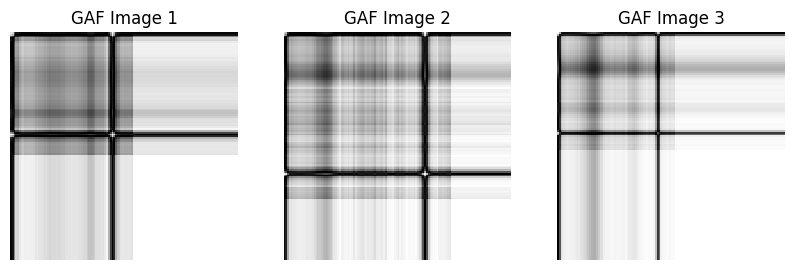

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyts.image import GramianAngularField

# Load dataset
def load_mitbih_csv():
    file_path = "/workspace/sandesh/Anamika/mitbih_train.csv"
    
    df = pd.read_csv(file_path, header=None)
    print("Dataset loaded successfully! Shape:", df.shape)
    
    # Extract signals and labels
    X = df.iloc[:, :-1].values  # ECG signals
    y = df.iloc[:, -1].values   # Labels

    return X, y

# Load data
X, y = load_mitbih_csv()

# Select a small subset to speed up GAF generation
selected_class = 0  # Normal beats (adjust as needed)
num_samples = 3  # Reduce number of samples for fast processing
selected_indices = np.where(y == selected_class)[0][:num_samples]
X_selected = X[selected_indices]

# Convert ECG signals to GAF images
gaf = GramianAngularField(method='summation', image_size=128)  # Smaller image size for speed
X_gaf = gaf.fit_transform(X_selected)  # Convert selected samples

# Plot GAF images
fig, axes = plt.subplots(1, num_samples, figsize=(10, 3))
for i in range(num_samples):
    sns.heatmap(X_gaf[i], cmap='gray', square=True, cbar=False, ax=axes[i])
    axes[i].set_title(f"GAF Image {i+1}")
    
    axes[i].axis('off')

plt.show()


In [30]:
# For exploratory purpose only
gasf = GramianAngularField(image_size=128, method='summation')

In [31]:
import numpy as np
from pyts.image import GramianAngularField

# Sample ECG signal (Replace with actual ECG signal)
n_timestamps = 128  # Length of ECG signal
ecg_signal = np.sin(np.linspace(0, 4 * np.pi, n_timestamps))  # Example signal

# Ensure image_size is <= n_timestamps
gaf = GramianAngularField(image_size=n_timestamps, method='summation')

# Transform the signal into a GAF image
gaf_image = gaf.fit_transform(ecg_signal.reshape(1, -1))

# Print the shape of the GAF image
print("GAF Image Shape:", gaf_image.shape)

GAF Image Shape: (1, 128, 128)


In [32]:
gasf

GramianAngularField(image_size=128)

In [33]:
type(gasf)

pyts.image.gaf.GramianAngularField

In [34]:
def convert_to_gaf_batch(x_train, batch_size=100):
    gasf = GramianAngularField(image_size=128)  # Smaller image size
    gaf_images = []
    
    for i in range(0, len(x_train), batch_size):
        batch = x_train[i:i+batch_size]
        gaf_images.append(gasf.fit_transform(batch))
    
    return np.vstack(gaf_images)

x_gasf_train = convert_to_gaf_batch(x_train, batch_size=100)
print("Optimized GAF shape:", x_gasf_train.shape)  # (num_samples, 64, 64)


Optimized GAF shape: (87554, 128, 128)


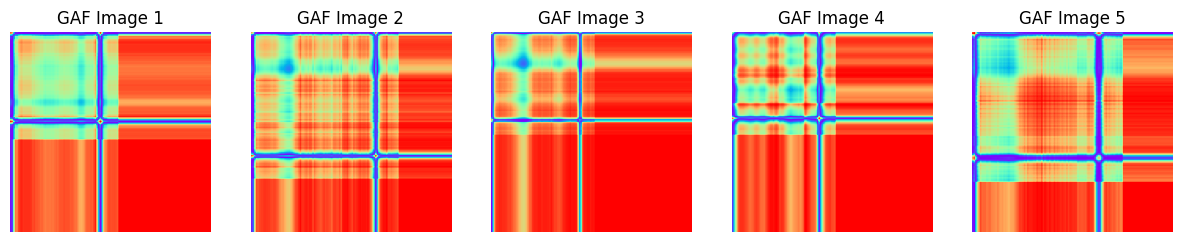

In [35]:
import matplotlib.pyplot as plt

# Select some random GAF images for visualization
num_samples_to_plot = 5
fig, axes = plt.subplots(1, num_samples_to_plot, figsize=(15, 5))

for i in range(num_samples_to_plot):
    axes[i].imshow(x_gasf_train[i], cmap='rainbow')  # Use 'rainbow' for better visualization
    axes[i].axis('off')
    axes[i].set_title(f"GAF Image {i+1}")

plt.show()


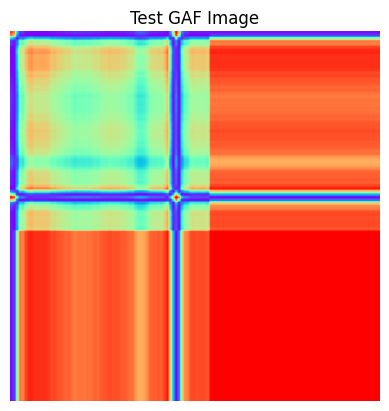

In [36]:
import numpy as np

# Convert Pandas Series to a NumPy array
x_train_array = np.array(x_train)

# Select a single ECG signal for testing and reshape it
ecg_signal_test = x_train_array[0].reshape(1, -1)

# Convert it to GAF
gaf_test_image = gasf.fit_transform(ecg_signal_test)

# Display the GAF image
import matplotlib.pyplot as plt

plt.imshow(gaf_test_image[0], cmap='rainbow')
plt.axis('off')
plt.title("Test GAF Image")
plt.show()


In [37]:
x_gasf_train = gasf.fit_transform(x_train)

In [38]:
x_gasf_train.shape

(87554, 128, 128)

In [39]:
x_gasf_test = gasf.transform(x_test)

In [40]:
x_gasf_train[87553]

array([[ 0.53415225,  0.35210184,  0.15409006, ..., -0.87582882,
        -0.87582882, -0.87582882],
       [ 0.35210184,  0.15549346, -0.0489628 , ..., -0.76009653,
        -0.76009653, -0.76009653],
       [ 0.15409006, -0.0489628 , -0.25136642, ..., -0.61181434,
        -0.61181434, -0.61181434],
       ...,
       [-0.87582882, -0.76009653, -0.61181434, ...,  1.        ,
         1.        ,  1.        ],
       [-0.87582882, -0.76009653, -0.61181434, ...,  1.        ,
         1.        ,  1.        ],
       [-0.87582882, -0.76009653, -0.61181434, ...,  1.        ,
         1.        ,  1.        ]])

In [41]:
x_train.values[87553, :].shape

(187,)

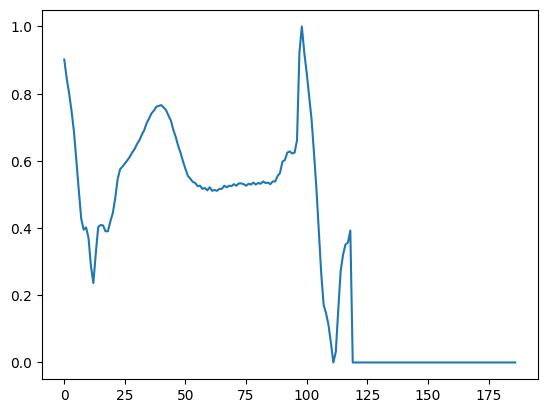

In [42]:
# Plot 1 heartbeat
x_train.values[87553, :]
plt.plot(np.arange(187), x_train.values[87553, :])

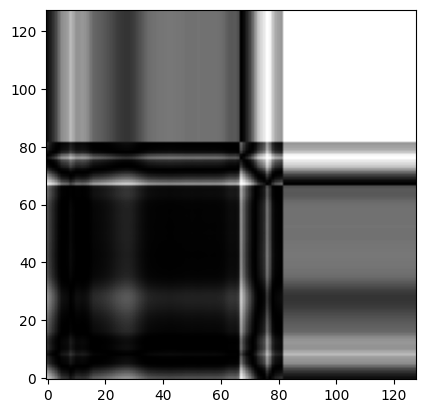

In [43]:
# GAF for 1 heartbeat
plt.imshow(x_gasf_train[87553], cmap='gray', origin='lower')

In [44]:
x_gasf_train[87553].shape

(128, 128)

In [45]:
def recurrence_plot(s, eps=None, steps=None):
    result = []
    if eps==None: eps=0.1
    if steps==None: steps=10
    d = pairwise_distances(s[:, None])
    d = d / eps
    d[d > steps] = steps
    return d/5. - 1

In [46]:
result = recurrence_plot(x_train.values[87553], steps=10)

In [47]:
result.shape

(187, 187)

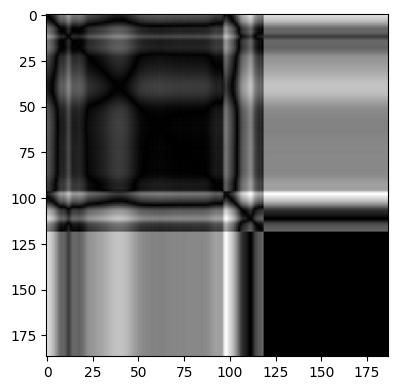

In [48]:
# Recurrence plot for 1 heartbeat
fig = plt.figure(figsize=(15,14))
ax = fig.add_subplot(2, 3, 1)
ax.imshow(result, cmap='gray')

array([[-1.        ],
       [-0.66442955],
       [ 0.14093959],
       ...,
       [-1.        ],
       [-1.        ],
       [-1.        ]])

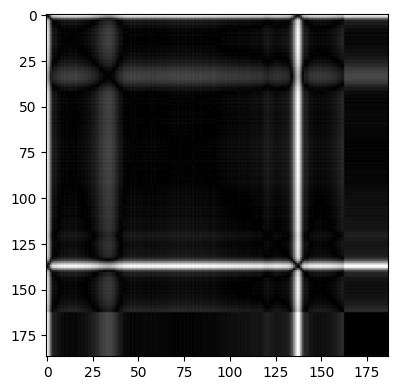

In [49]:
# Test
fig = plt.figure(figsize=(15,14))
ax = fig.add_subplot(2, 3, 1)
ax.imshow(recurrence_plot(x_train.values[25], steps=10), cmap='gray')
d = recurrence_plot(x_train.values[25], steps=10)
scaler = MinMaxScaler((-1, 1))
x = scaler.fit_transform(d.reshape(187 * 187, 1))
x

In [50]:
y_train =train_df[187].values.astype(int)
y_test = test_df[187].values.astype(int)

In [51]:
# upsampling to reduce class imbalance
smt2 = SMOTE(sampling_strategy={1: 30000, 2: 20000, 3: 20000, 4: 10000},random_state=42)
x_train_2, y_train_2 = smt2.fit_resample(x_train, y_train)

In [52]:
x_train.shape

(87554, 187)

In [53]:
x_train_2.shape

(152471, 187)

In [54]:
gasf = GramianAngularField(image_size=128, method='summation')
x_gasf_train_2 = gasf.fit_transform(x_train_2)
x_gasf_test_2 = gasf.transform(x_test)

In [55]:
import gc
del x_train_2, x_test  # Delete unused variables
gc.collect()  # Free RAM

8517

In [56]:
import h5py
import numpy as np
from PIL import Image
import dask.array as da

# Set parameters
BATCH_SIZE = 500  # Adjust based on RAM
IMG_SIZE = (128, 128)  # Change to (128, 128) if memory still crashes

# Open HDF5 file in write mode
with h5py.File('hb_data_mit_bih_balanced_2.hdf5', mode='w') as hdf5_file:
    # Create datasets with chunking
    hdf5_file.create_dataset("x_train", (len(x_gasf_train_2), *IMG_SIZE), np.float32, chunks=(BATCH_SIZE, *IMG_SIZE))
    hdf5_file.create_dataset("y_train", (len(y_train_2),), np.int32, chunks=(BATCH_SIZE,))
    hdf5_file.create_dataset("x_test", (len(x_gasf_test_2), *IMG_SIZE), np.float32, chunks=(BATCH_SIZE, *IMG_SIZE))
    hdf5_file.create_dataset("y_test", (len(y_test),), np.int32, chunks=(BATCH_SIZE,))

    # Convert to Dask arrays with correct chunking
    x_train_2_dask = da.from_array(x_gasf_train_2, chunks=(BATCH_SIZE, 64, 64))
    x_test_dask = da.from_array(x_gasf_test_2, chunks=(BATCH_SIZE, 64, 64))

    # Function to process a batch
    def process_batch(x_batch):
        images_resized = []
        for img in x_batch:
            image = Image.fromarray(img.astype(np.float32))
            image = image.resize(IMG_SIZE)
            images_resized.append((np.array(image) * 255).astype(np.uint8))  # Convert float32 (0-1) to uint8 (0-255)

            #images_resized.append(np.array(image))
        return np.array(images_resized)

    # Process training data in batches
    for i in range(0, len(x_gasf_train_2), BATCH_SIZE):
        x_batch = x_train_2_dask[i : i + BATCH_SIZE].compute()
        y_batch = y_train_2[i : i + BATCH_SIZE]
        hdf5_file["x_train"][i : i + BATCH_SIZE] = process_batch(x_batch)
        hdf5_file["y_train"][i : i + BATCH_SIZE] = y_batch

    # Process testing data in batches
    for i in range(0, len(x_gasf_test_2), BATCH_SIZE):
        x_batch = x_test_dask[i : i + BATCH_SIZE].compute()
        y_batch = y_test[i : i + BATCH_SIZE]
        hdf5_file["x_test"][i : i + BATCH_SIZE] = process_batch(x_batch)
        hdf5_file["y_test"][i : i + BATCH_SIZE] = y_batch


In [57]:
print(h5py.File)

<class 'h5py._hl.files.File'>


In [58]:
import h5py

file_path = "hb_data_mit_bih_balanced_2.hdf5"  # Replace with your actual file path

with h5py.File(file_path, "r") as hdf5_file:
    print("HDF5 file location:", hdf5_file.filename)  # ✅ Correct


HDF5 file location: hb_data_mit_bih_balanced_2.hdf5


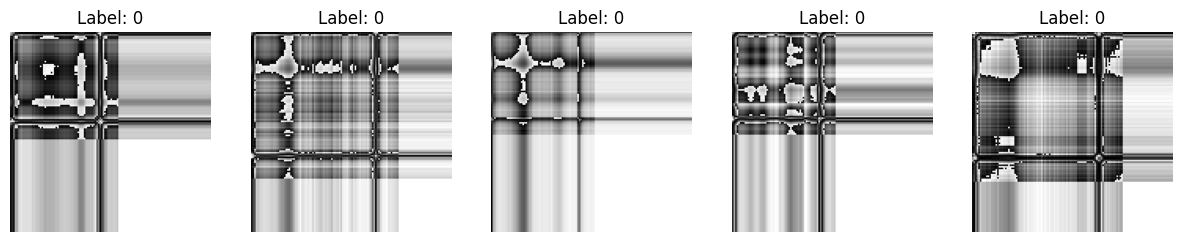

In [59]:
import h5py
import matplotlib.pyplot as plt

# Open the HDF5 file
with h5py.File("hb_data_mit_bih_balanced_2.hdf5", "r") as hdf5_file:
    x_train_sample = hdf5_file["x_train"][:5]  # Load first 5 images
    y_train_sample = hdf5_file["y_train"][:5]  # Load first 5 labels

# Display images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(x_train_sample[i], cmap="gray")  # Display in grayscale
    axes[i].set_title(f"Label: {y_train_sample[i]}")
    axes[i].axis("off")

plt.show()


In [60]:
with h5py.File("hb_data_mit_bih_balanced_2.hdf5", "r") as hdf5_file:
    print("Min:", hdf5_file["x_train"][:].min(), "Max:", hdf5_file["x_train"][:].max())


Min: 0.0 Max: 255.0


In [61]:
import h5py

with h5py.File('hb_data_mit_bih_balanced_2.hdf5', 'r') as hdf5_file:
    print(list(hdf5_file.keys()))  # Lists dataset names


['x_test', 'x_train', 'y_test', 'y_train']


In [62]:
with h5py.File('hb_data_mit_bih_balanced_2.hdf5', 'r') as hdf5_file:
    for key in hdf5_file.keys():
        print(f"{key} shape: {hdf5_file[key].shape}, dtype: {hdf5_file[key].dtype}")


x_test shape: (21892, 128, 128), dtype: float32
x_train shape: (152471, 128, 128), dtype: float32
y_test shape: (21892,), dtype: int32
y_train shape: (152471,), dtype: int32


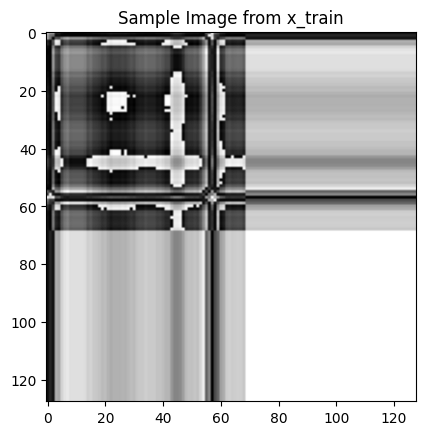

In [63]:
import matplotlib.pyplot as plt

with h5py.File('hb_data_mit_bih_balanced_2.hdf5', 'r') as hdf5_file:
    img = hdf5_file["x_train"][0]  # Get first image
    plt.imshow(img, cmap="gray")  # Assuming grayscale
    plt.title("Sample Image from x_train")
    plt.show()


In [64]:
from imblearn.over_sampling import SMOTE
from pyts.image import GramianAngularField

# Define SMOTE without n_jobs (remove deprecated parameter)
smt3 = SMOTE(sampling_strategy={1: 30000, 2: 20000, 3: 20000, 4: 10000}, random_state=42)

# Apply SMOTE
x_train_3, y_train_3 = smt3.fit_resample(x_train, y_train)

# Apply Gramian Angular Field transformation
gasf = GramianAngularField(image_size=128, method='difference')
x_gasf_train_3 = gasf.fit_transform(x_train_3)

print("Resampled data shape:", x_train_3.shape)
print("GASF transformed data shape:", x_gasf_train_3.shape)


Resampled data shape: (152471, 187)
GASF transformed data shape: (152471, 128, 128)


In [65]:
from sklearn.model_selection import train_test_split

# Ensure x_test and y_test exist
x_train_3, x_test, y_train_3, y_test = train_test_split(x_train_3, y_train_3, test_size=0.2, random_state=42)

# Apply Gramian Angular Field transformation
from pyts.image import GramianAngularField

gasf = GramianAngularField(image_size=128, method='difference')
x_gasf_train_3 = gasf.fit_transform(x_train_3)
x_gasf_test_3 = gasf.fit_transform(x_test)  # Now x_test is defined

# Save to HDF5 file
import h5py

with h5py.File("dataset.h5", "w") as hdf5_file:
    hdf5_file.create_dataset("x_train", (len(x_gasf_train_3), 128, 128), np.float32)
    hdf5_file.create_dataset("y_train", (len(y_train_3),), np.int32)
    hdf5_file.create_dataset("x_test", (len(x_gasf_test_3), 128, 128), np.float32)
    hdf5_file.create_dataset("y_test", (len(y_test),), np.int32)


In [66]:
from sklearn.model_selection import train_test_split

# Split the dataset if needed
x_train_2, x_test, y_train_2, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [67]:
with h5py.File('hb_data_mit_bih_balanced_rp.hdf5', mode='w') as hdf5_file:
    hdf5_file.create_dataset("x_train", (len(x_train_2), 128, 128), np.float32)
    hdf5_file.create_dataset("y_train", (len(y_train_2),), np.int32)
    hdf5_file.create_dataset("x_test", (len(x_test), 128, 128), np.float32)
    hdf5_file.create_dataset("y_test", (len(y_test),), np.int32)
    
    transform = transforms.Compose([transforms.Resize((128, 128))])
    
    for i, (x, y) in enumerate(zip(x_train_2.values, y_train_2)):
        r = recurrence_plot(x, steps=10)
        image = Image.fromarray(r.astype(float))
        t = np.array(transform(image))
        hdf5_file["x_train"][i, ...] = t
        hdf5_file["y_train"][i] = y

    for i, (x, y) in enumerate(zip(x_test.values, y_test)):
        r = recurrence_plot(x, steps=10)
        image = Image.fromarray(r.astype(float))
        t = np.array(transform(image))
        hdf5_file["x_test"][i, ...] = t
        hdf5_file["y_test"][i] = y

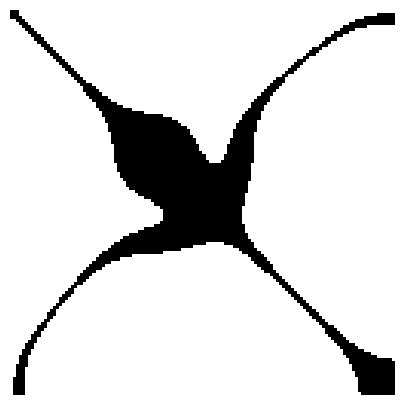

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from scipy.signal import butter, filtfilt

# ✅ Function to Apply Butterworth Filter (Smooth ECG)
def butter_lowpass_filter(data, cutoff=1.0, fs=100.0, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

# ✅ Function for Time-Delay Embedding
def time_delay_embedding(signal, delay=2, m=3):
    n = len(signal)
    embedded = np.array([signal[i : n - (m - 1) * delay + i : delay] for i in range(m)]).T
    return embedded

# ✅ Function to Generate Recurrence Plot
def recurrence_plot(s, eps=0.08):  # 🔹 Reduce `eps` to remove blob effects
    s = np.array(s, dtype=np.float32).flatten()

    # ✅ Apply Low-pass Filter to ECG
    s = butter_lowpass_filter(s)

    # ✅ Normalize ECG Signal
    s = (s - np.min(s)) / (np.max(s) - np.min(s) + 1e-8)

    # ✅ Apply Time-Delay Embedding
    embedded_s = time_delay_embedding(s, delay=2, m=3)

    # ✅ Compute Pairwise Euclidean Distance Matrix
    d = pairwise_distances(embedded_s)

    # ✅ Apply a Threshold for Recurrence
    d = np.where(d < eps, 1, 0)

    return d  # Return binary recurrence plot

# ✅ Load ECG Signal (Replace with real ECG)
np.random.seed(42)
ecg_signal = np.cumsum(np.random.randn(256))  # Simulated ECG-like random walk

# ✅ Generate Recurrence Plot
rp_image = recurrence_plot(ecg_signal, eps=0.08)  # 🔹 Adjusted `eps` for better grid formation

# ✅ Display Recurrence Plot
plt.figure(figsize=(5, 5))
plt.imshow(rp_image, cmap='gray_r', aspect='equal')
plt.axis("off")
plt.show()


In [69]:
!pip install torchvision

In [70]:
!pip install --upgrade typing_extensions


In [71]:
!pip install pyts

In [72]:
import numpy as np
import pandas as pd
import h5py
from PIL import Image
import torchvision.transforms as transforms
from pyts.image import RecurrencePlot
import matplotlib.pyplot as plt

# ✅ Load MIT-BIH dataset (replace with your own path if needed)
train_df = pd.read_csv('/workspace/sandesh/Anamika/mitbih_train.csv', header=None)
test_df = pd.read_csv('/workspace/sandesh/Anamika/mitbih_test.csv', header=None)

# ✅ Combine train and test datasets
full_df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)

# ✅ Split features and labels
X_data = full_df.iloc[:, :-1].values  # ECG signals
y_data = full_df.iloc[:, -1].values   # Labels (0-4)

# ✅ Convert ECG signals to Recurrence Plot images
rp_transform = RecurrencePlot()

print("🔄 Generating recurrence plots...")
X_rp = rp_transform.fit_transform(X_data)  # Shape: (samples, 128, 128)
X_rp = (X_rp * 255).astype(np.uint8)       # Scale to 0-255 for image

# ✅ Resize images to (128x128) with PyTorch transform
resize_transform = transforms.Compose([
    transforms.Resize((128, 128))
])

X_rp_resized = np.zeros((X_rp.shape[0], 128, 128), dtype=np.uint8)

for i in range(X_rp.shape[0]):
    img = Image.fromarray(X_rp[i])
    img_resized = resize_transform(img)
    X_rp_resized[i] = np.array(img_resized)

# ✅ Save Recurrence Plots and Labels to HDF5
with h5py.File('mitbih_ecg_rp_data.hdf5', 'w') as hdf5_file:
    hdf5_file.create_dataset("x_rp", data=X_rp_resized, dtype=np.uint8)
    hdf5_file.create_dataset("y_labels", data=y_data, dtype=np.int32)

print("✅ RP images for MIT-BIH saved successfully in HDF5 format!")


🔄 Generating recurrence plots...
✅ RP images for MIT-BIH saved successfully in HDF5 format!


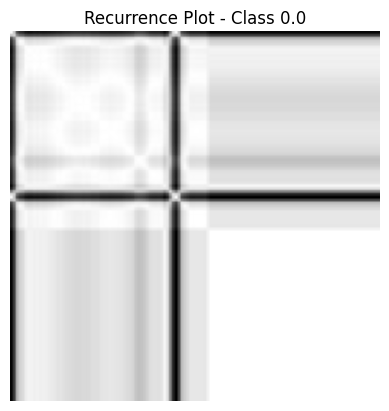

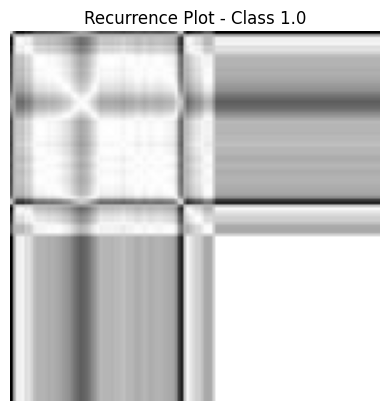

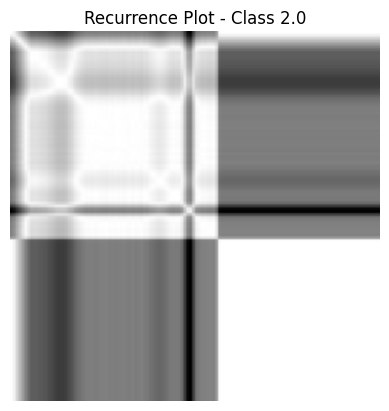

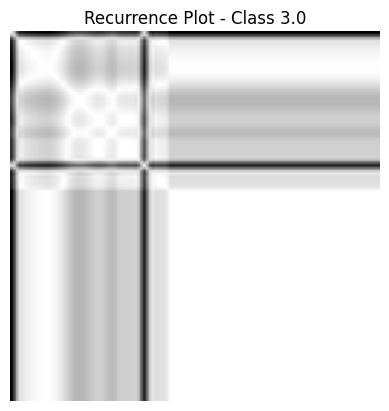

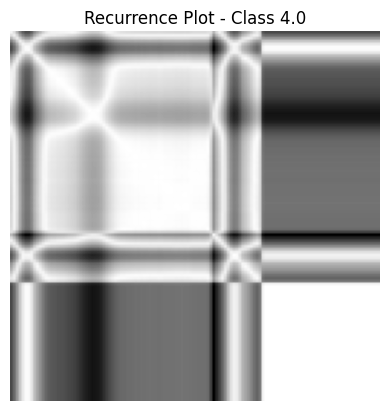

In [73]:
# Visualize one recurrence plot per class
for label in np.unique(y_data):
    idx = np.where(y_data == label)[0][0]
    plt.imshow(X_rp_resized[idx], cmap='gray_r')
    plt.title(f"Recurrence Plot - Class {label}")
    plt.axis("off")
    plt.show()


🔄 Generating RP, GAF, and Mean images...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 109446/109446 [04:10<00:00, 437.33it/s]


✅ RP, GAF, and Mean 3-channel images saved to 'mitbih_ecg_rp_gaf_mean.hdf5' 🎉
Sample 0 - RP min: 0.0000, max: 1.3851
Sample 0 - RP unique values: 4282


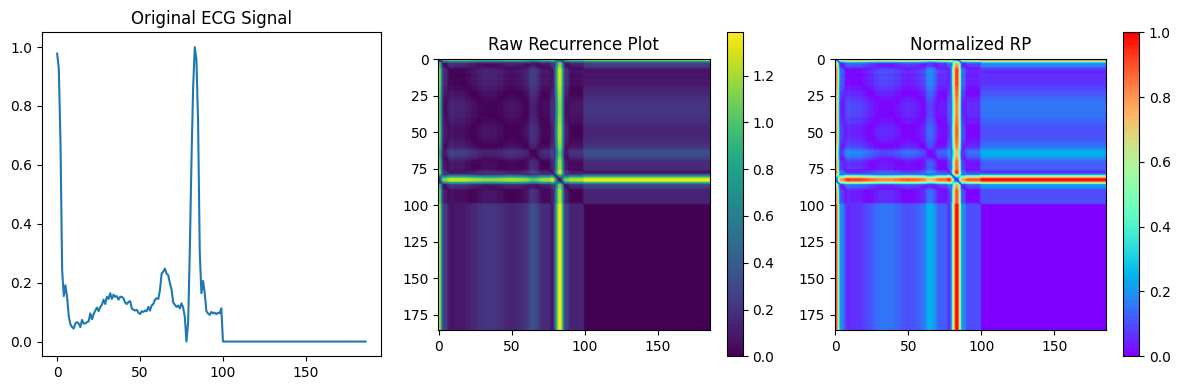

Sample 100 - RP min: 0.0000, max: 1.2708
Sample 100 - RP unique values: 2983


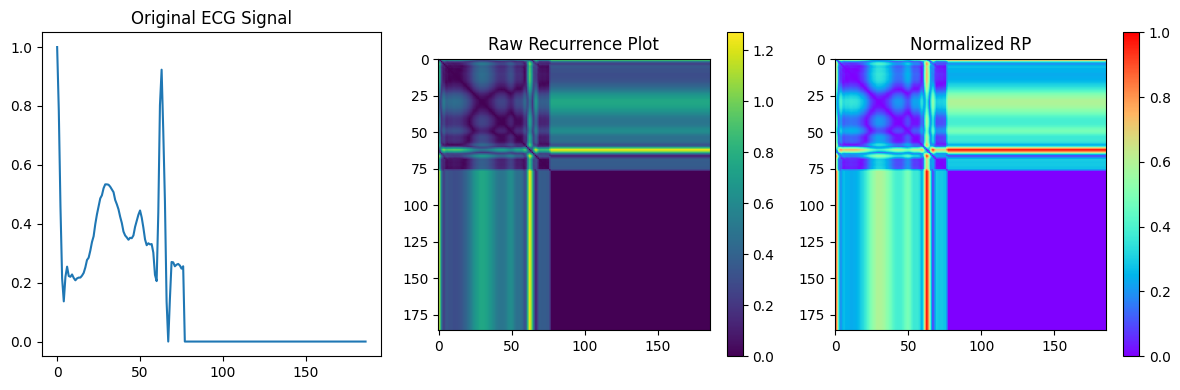

Sample 200 - RP min: 0.0000, max: 1.2697
Sample 200 - RP unique values: 3789


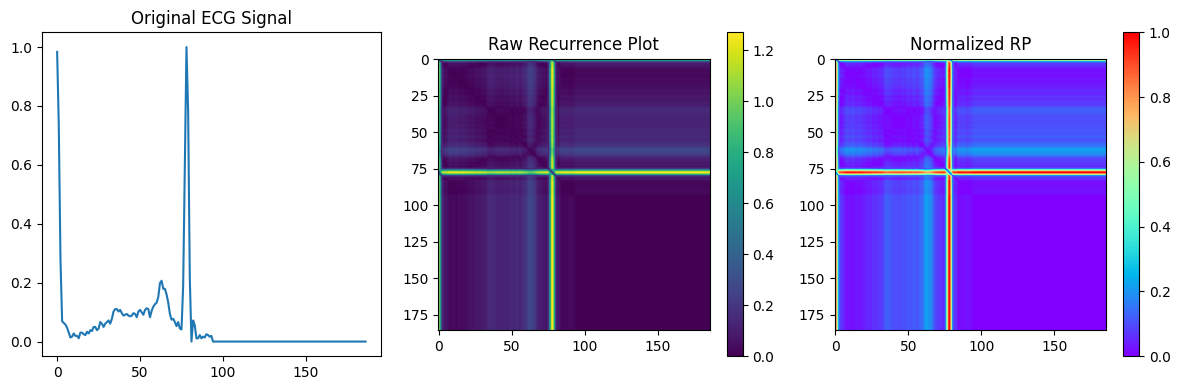

Visualizing images from saved HDF5 file:


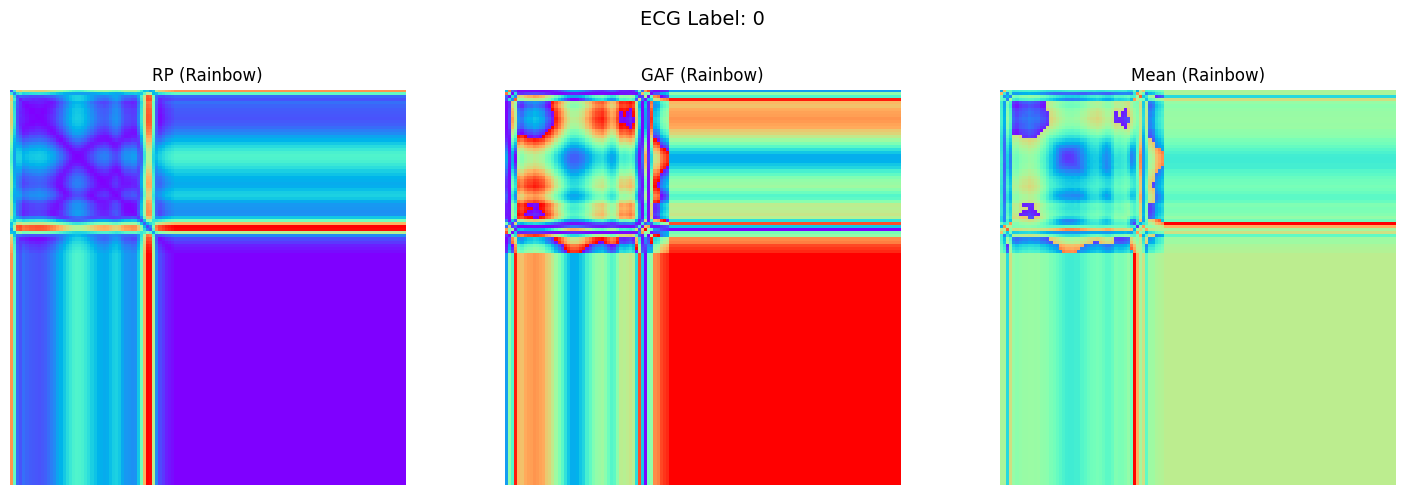

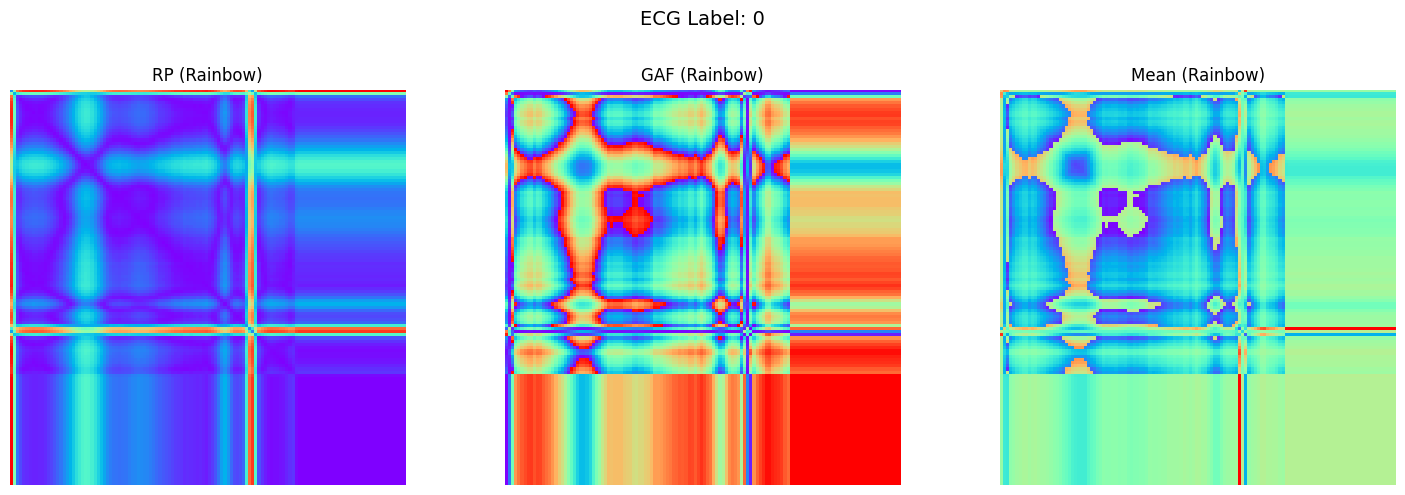

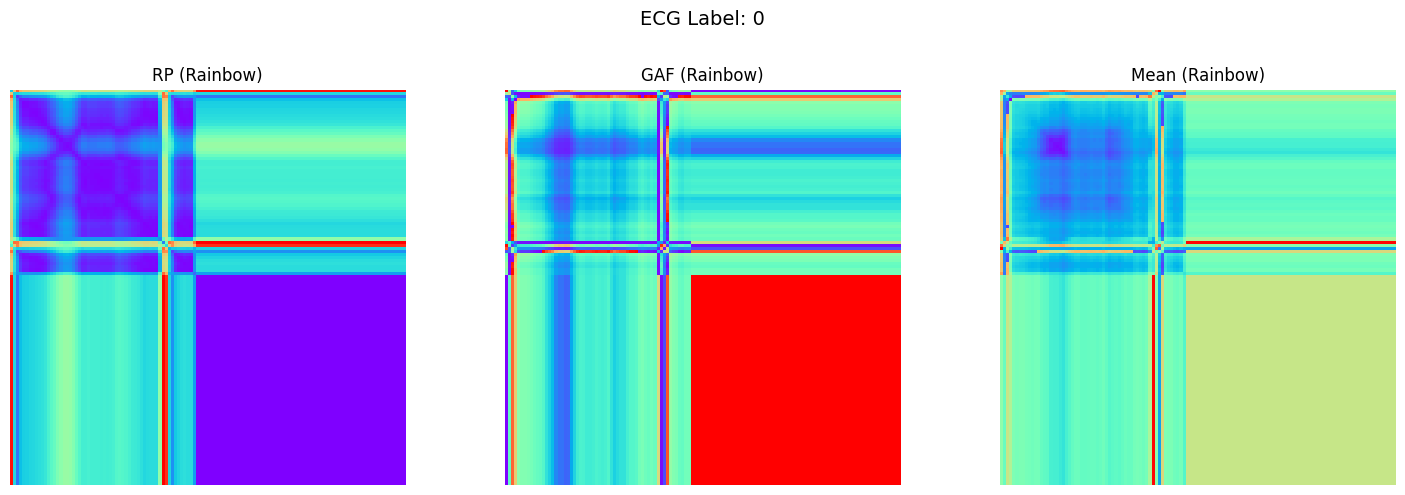

In [74]:
import numpy as np
import pandas as pd
import h5py
from PIL import Image
import torchvision.transforms as transforms
from pyts.image import RecurrencePlot, GramianAngularField
from tqdm import tqdm
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

# ✅ Load MIT-BIH Dataset
train_df = pd.read_csv('/workspace/sandesh/Anamika/mitbih_train.csv', header=None)
test_df = pd.read_csv('/workspace/sandesh/Anamika/mitbih_test.csv', header=None)
full_df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)

X_data = full_df.iloc[:, :-1].values  # ECG signals
y_data = full_df.iloc[:, -1].values   # Labels (0-4)
num_samples = X_data.shape[0]

# ✅ Image transformers - FIXED RecurrencePlot parameters
rp_transform = RecurrencePlot(dimension=2, time_delay=1, threshold=None)  # Key fix: removed threshold
gaf_transform = GramianAngularField(image_size=128, method='summation')
resize_transform = transforms.Resize((128, 128))

# ✅ Storage array for 3-channel images (RP, GAF, Mean)
X_3channel = np.zeros((num_samples, 3, 128, 128), dtype=np.uint8)

print("🔄 Generating RP, GAF, and Mean images...")
for i in tqdm(range(num_samples)):
    signal = X_data[i].reshape(1, -1)

    # RP - FIXED with proper normalization
    rp_img = rp_transform.fit_transform(signal)[0]
    
    # Normalize RP to [0,1] range properly
    if np.max(rp_img) != np.min(rp_img):  # Prevent division by zero
        rp_img = (rp_img - np.min(rp_img)) / (np.max(rp_img) - np.min(rp_img))
    else:
        rp_img = np.zeros_like(rp_img)
    
    rp_img = (rp_img * 255).astype(np.uint8)
    rp_img = np.array(resize_transform(Image.fromarray(rp_img)))

    # GAF
    gaf_img = gaf_transform.fit_transform(signal)[0]
    gaf_img = (gaf_img * 255).astype(np.uint8)

    # Mean of RP and GAF
    mean_img = ((rp_img.astype(np.float32) + gaf_img.astype(np.float32)) / 2).astype(np.uint8)

    # Stack into 3 channels
    X_3channel[i, 0, :, :] = rp_img
    X_3channel[i, 1, :, :] = gaf_img
    X_3channel[i, 2, :, :] = mean_img

# ✅ Save to HDF5 with proper attributes
with h5py.File('mitbih_ecg_rp_gaf_mean.hdf5', 'w') as hdf5_file:
    dset = hdf5_file.create_dataset("x_3channel", data=X_3channel, dtype=np.uint8, 
                                   compression="gzip", compression_opts=9)
    dset.attrs['CLASS'] = 'IMAGE'
    dset.attrs['IMAGE_VERSION'] = '1.2'
    
    labels_dset = hdf5_file.create_dataset("y_labels", data=y_data, dtype=np.int32)

print("✅ RP, GAF, and Mean 3-channel images saved to 'mitbih_ecg_rp_gaf_mean.hdf5' 🎉")

# Verification function - test a few samples before saving to HDF5
def verify_transformations(X_data, indices=[0, 100, 200]):
    for idx in indices:
        signal = X_data[idx].reshape(1, -1)
        
        # Generate RP
        rp_img = rp_transform.fit_transform(signal)[0]
        
        # Check distribution
        print(f"Sample {idx} - RP min: {np.min(rp_img):.4f}, max: {np.max(rp_img):.4f}")
        print(f"Sample {idx} - RP unique values: {len(np.unique(rp_img))}")
        
        plt.figure(figsize=(12, 4))
        
        # Original signal
        plt.subplot(1, 3, 1)
        plt.plot(signal[0])
        plt.title("Original ECG Signal")
        
        # Raw RP before normalization
        plt.subplot(1, 3, 2)
        plt.imshow(rp_img, cmap='viridis')
        plt.colorbar()
        plt.title("Raw Recurrence Plot")
        
        # Normalized RP
        plt.subplot(1, 3, 3)
        if np.max(rp_img) != np.min(rp_img):
            normalized = (rp_img - np.min(rp_img)) / (np.max(rp_img) - np.min(rp_img))
        else:
            normalized = np.zeros_like(rp_img)
        plt.imshow(normalized, cmap='rainbow')
        plt.colorbar()
        plt.title("Normalized RP")
        
        plt.tight_layout()
        plt.show()

# Run verification on a few samples
verify_transformations(X_data, indices=[0, 100, 200])

# Visualization function for saved HDF5 data
def visualize_saved_images(hdf5_file='mitbih_ecg_rp_gaf_mean.hdf5', num_samples=3):
    with h5py.File(hdf5_file, 'r') as f:
        X_3channel = f['x_3channel'][:]
        y_labels = f['y_labels'][:]
    
    indices = random.sample(range(len(X_3channel)), num_samples)
    
    for idx in indices:
        img = X_3channel[idx]  # Shape: (3, 128, 128)
        label = int(y_labels[idx])
        
        plt.figure(figsize=(15, 5))
        plt.suptitle(f"ECG Label: {label}", fontsize=14)

        plt.subplot(1, 3, 1)
        plt.imshow(img[0], cmap='rainbow')
        plt.title("RP (Rainbow)")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.imshow(img[1], cmap='rainbow')
        plt.title("GAF (Rainbow)")
        plt.axis("off")

        plt.subplot(1, 3, 3)
        plt.imshow(img[2], cmap='rainbow')
        plt.title("Mean (Rainbow)")
        plt.axis("off")

        plt.tight_layout(rect=[0, 0, 1, 0.92])
        plt.show()

# Visualize after saving
print("Visualizing images from saved HDF5 file:")
visualize_saved_images()


🔄 Generating MTF images...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 109446/109446 [01:40<00:00, 1089.50it/s]


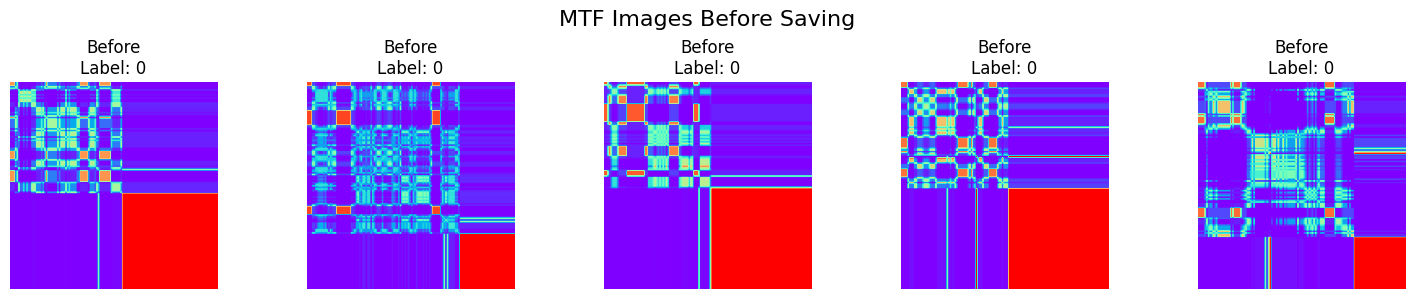

✅ MTF images saved to 'mitbih_ecg_mtf.hdf5' 🎉


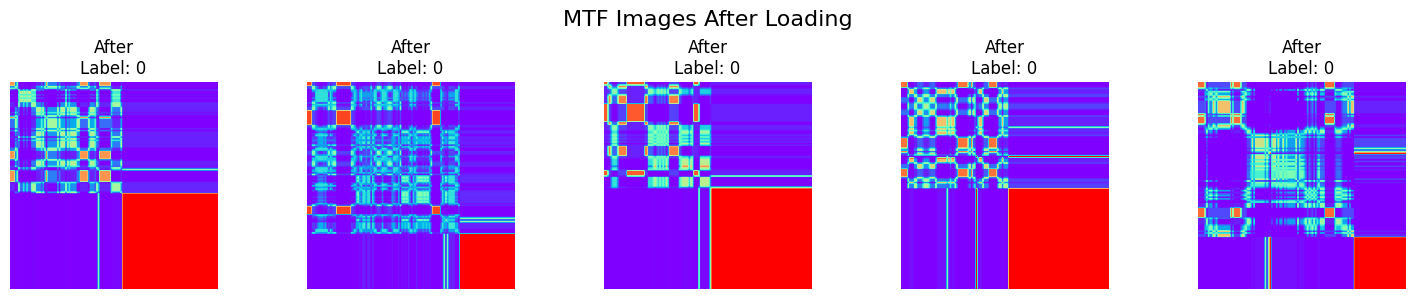

In [75]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from pyts.image import MarkovTransitionField
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

# ✅ Load ECG Data
train_df = pd.read_csv('/workspace/sandesh/Anamika/mitbih_train.csv', header=None)
test_df = pd.read_csv('/workspace/sandesh/Anamika/mitbih_test.csv', header=None)
full_df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)

X_data = full_df.iloc[:, :-1].values
y_data = full_df.iloc[:, -1].values
num_samples = X_data.shape[0]

# ✅ Generate MTF Images
mtf_transform = MarkovTransitionField(image_size=128)
X_mtf = np.zeros((num_samples, 128, 128), dtype=np.uint8)

print("🔄 Generating MTF images...")
for i in tqdm(range(num_samples)):
    signal = X_data[i].reshape(1, -1)
    mtf_img = mtf_transform.fit_transform(signal)[0]
    mtf_img = (mtf_img * 255).astype(np.uint8)
    X_mtf[i] = mtf_img

# ✅ Visualize First 5 MTF Images Before Saving
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_mtf[i], cmap='rainbow')
    plt.title(f"Before\nLabel: {int(y_data[i])}")
    plt.axis('off')
plt.suptitle("MTF Images Before Saving", fontsize=16)
plt.tight_layout()
plt.show()

# ✅ Save MTF to HDF5
with h5py.File('mitbih_ecg_mtf.hdf5', 'w') as hdf5_file:
    hdf5_file.create_dataset("x_mtf", data=X_mtf, dtype=np.uint8)
    hdf5_file.create_dataset("y_labels", data=y_data, dtype=np.int32)

print("✅ MTF images saved to 'mitbih_ecg_mtf.hdf5' 🎉")

# ✅ Load and Visualize First 5 MTF Images After Saving
with h5py.File('mitbih_ecg_mtf.hdf5', 'r') as hdf:
    X_mtf_loaded = hdf['x_mtf'][:]
    y_loaded = hdf['y_labels'][:]

plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_mtf_loaded[i], cmap='rainbow')
    plt.title(f"After\nLabel: {int(y_loaded[i])}")
    plt.axis('off')
plt.suptitle("MTF Images After Loading", fontsize=16)
plt.tight_layout()
plt.show()




In [76]:
import numpy as np
import pandas as pd
import h5py
from PIL import Image
from torchvision import transforms
from pyts.image import MarkovTransitionField

# ✅ Define safe image size (must be ≤ ECG signal length)
SAFE_IMAGE_SIZE = 100

# ✅ Define MTF generation function
def get_mtf(signal):
    mtf_transform = MarkovTransitionField(image_size=SAFE_IMAGE_SIZE)
    return mtf_transform.fit_transform(signal.reshape(1, -1))[0]

# ✅ Resize transform to 224×224 for deep learning models
resize_transform = transforms.Compose([transforms.Resize((224, 224))])

# ✅ Save HDF5 file (local path)
file_path = 'hb_data_mit_bih_balanced_mtf.hdf5'
with h5py.File(file_path, mode='w') as hdf5_file:
    hdf5_file.create_dataset("x_train", (len(x_train_3), 224, 224), np.float32)
    hdf5_file.create_dataset("y_train", (len(y_train_3),), np.int32)
    hdf5_file.create_dataset("x_test", (len(x_test), 224, 224), np.float32)
    hdf5_file.create_dataset("y_test", (len(y_test),), np.int32)

    for i, (x, y) in enumerate(zip(x_train_3.values, y_train_3)):
        mtf = get_mtf(x)
        image = Image.fromarray(mtf.astype(np.float32))
        resized = np.array(resize_transform(image))
        hdf5_file["x_train"][i, ...] = resized
        hdf5_file["y_train"][i] = y

    for i, (x, y) in enumerate(zip(x_test.values, y_test)):
        mtf = get_mtf(x)
        image = Image.fromarray(mtf.astype(np.float32))
        resized = np.array(resize_transform(image))
        hdf5_file["x_test"][i, ...] = resized
        hdf5_file["y_test"][i] = y

print("✅ All MTF images saved to:", file_path)


✅ All MTF images saved to: hb_data_mit_bih_balanced_mtf.hdf5


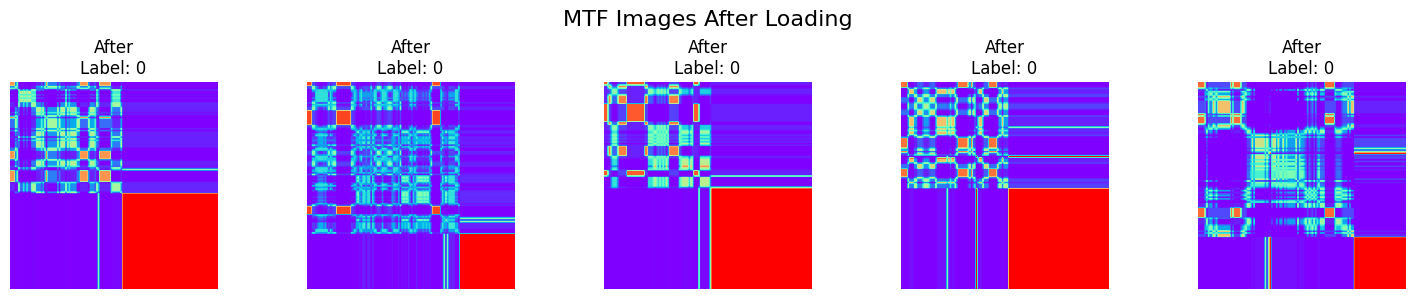

In [77]:
# ✅ Load and Visualize First 5 MTF Images After Saving
with h5py.File('mitbih_ecg_mtf.hdf5', 'r') as hdf:
    X_mtf_loaded = hdf['x_mtf'][:]
    y_loaded = hdf['y_labels'][:]

plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_mtf_loaded[i], cmap='rainbow')
    plt.title(f"After\nLabel: {int(y_loaded[i])}")
    plt.axis('off')
plt.suptitle("MTF Images After Loading", fontsize=16)
plt.tight_layout()
plt.show()


In [81]:
import os
import h5py
import numpy as np
from PIL import Image
from torchvision import transforms
from pyts.image import GramianAngularField, MarkovTransitionField

# ==== Resize transform ====
resize_transform = transforms.Compose([transforms.Resize((224, 224))])

# ==== RP implementation ====
def recurrence_plot(signal, steps=10):
    signal = np.array(signal)
    if len(signal) < 224:
        signal = np.pad(signal, (0, 224 - len(signal)), mode='constant')
    size = len(signal)
    rp = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            rp[i, j] = abs(signal[i] - signal[j])
    return rp / np.max(rp)

# ==== MTF implementation ====
def get_mtf(signal):
    signal = np.array(signal)
    if len(signal) < 224:
        signal = np.pad(signal, (0, 224 - len(signal)), mode='constant')
    mtf = MarkovTransitionField(image_size=224)
    return mtf.fit_transform(signal.reshape(1, -1))[0]

# ==== GAF implementation ====
gaf_transform = GramianAngularField(image_size=224, method='summation')

# ==== Define output path ====
output_path = './hb_data_mit_bih_balanced_gaf_rp_mtf.hdf5'

# ==== Remove file if it exists to avoid lock error ====
if os.path.exists(output_path):
    os.remove(output_path)

# ==== Create and write the HDF5 file ====
with h5py.File(output_path, mode='w') as hdf5_file:
    hdf5_file.create_dataset("x_train", (len(x_train_3), 3, 224, 224), np.float32)
    hdf5_file.create_dataset("y_train", (len(y_train_3),), np.int32)
    hdf5_file.create_dataset("x_test", (len(x_test), 3, 224, 224), np.float32)
    hdf5_file.create_dataset("y_test", (len(y_test),), np.int32)

    # ==== Training set ====
    for i, (x1, x2, y) in enumerate(zip(x_gasf_train_3, x_train_3.values, y_train_3)):
        # Channel 1 - GAF
        image = Image.fromarray(x1.astype(float))
        t1 = np.array(resize_transform(image))

        # Channel 2 - RP
        r = recurrence_plot(x2)
        image = Image.fromarray(r.astype(float))
        t2 = np.array(resize_transform(image))

        # Channel 3 - MTF
        mtf = get_mtf(x2)
        image = Image.fromarray(mtf.astype(float))
        t3 = np.array(resize_transform(image))

        # Stack channels
        hdf5_file["x_train"][i, 0, ...] = t1
        hdf5_file["x_train"][i, 1, ...] = t2
        hdf5_file["x_train"][i, 2, ...] = t3
        hdf5_file["y_train"][i] = y

    # ==== Testing set ====
    for i, (x1, x2, y) in enumerate(zip(x_gasf_test_3, x_test.values, y_test)):
        # Channel 1 - GAF
        image = Image.fromarray(x1.astype(float))
        t1 = np.array(resize_transform(image))

        # Channel 2 - RP
        r = recurrence_plot(x2)
        image = Image.fromarray(r.astype(float))
        t2 = np.array(resize_transform(image))

        # Channel 3 - MTF
        mtf = get_mtf(x2)
        image = Image.fromarray(mtf.astype(float))
        t3 = np.array(resize_transform(image))

        # Stack channels
        hdf5_file["x_test"][i, 0, ...] = t1
        hdf5_file["x_test"][i, 1, ...] = t2
        hdf5_file["x_test"][i, 2, ...] = t3
        hdf5_file["y_test"][i] = y

print("✅ HDF5 file created successfully at:", output_path)

✅ HDF5 file created successfully at: ./hb_data_mit_bih_balanced_gaf_rp_mtf.hdf5


In [79]:

import numpy as np
import h5py
from PIL import Image
from torchvision import transforms
from pyts.image import MarkovTransitionField
from scipy.signal import resample
import os

# === Custom Functions ===
def recurrence_plot(signal, steps=10):
    signal = np.array(signal)
    d = np.abs(signal[:, None] - signal[None, :])
    return (d < (np.max(d) / steps)).astype(float)

def get_mtf(signal):
    signal = np.array(signal)
    if len(signal) != 224:
        signal = resample(signal, 224)  # Resample to required length
    mtf_transform = MarkovTransitionField(image_size=224)
    return mtf_transform.fit_transform(signal.reshape(1, -1))[0]

# === Transform for resizing images ===
resize_transform = transforms.Compose([transforms.Resize((224, 224))])

# === Output path (update if needed) ===
output_path = './hb_data_mit_bih_balanced_gaf_rp_mtf.hdf5'

# === Create and write the HDF5 file ===
with h5py.File(output_path, mode='w') as hdf5_file:
    hdf5_file.create_dataset("x_train", (len(x_train_3), 3, 224, 224), np.float32)
    hdf5_file.create_dataset("y_train", (len(y_train_3),), np.int32)
    hdf5_file.create_dataset("x_test", (len(x_test), 3, 224, 224), np.float32)
    hdf5_file.create_dataset("y_test", (len(y_test),), np.int32)
    
    # === Training Data ===
    for i, (x1, x2, y) in enumerate(zip(x_gasf_train_3, x_train_3.values, y_train_3)):
        # Channel 1 - GASF
        image = Image.fromarray(x1.astype(float))
        t1 = np.array(resize_transform(image))

        # Channel 2 - RP
        r = recurrence_plot(x2, steps=10)
        image = Image.fromarray(r.astype(float))
        t2 = np.array(resize_transform(image))

        # Channel 3 - MTF
        mtf = get_mtf(x2)
        image = Image.fromarray(mtf.astype(float))
        t3 = np.array(resize_transform(image))

        hdf5_file["x_train"][i, 0, ...] = t1
        hdf5_file["x_train"][i, 1, ...] = t2
        hdf5_file["x_train"][i, 2, ...] = t3
        hdf5_file["y_train"][i] = y

    # === Test Data ===
    for i, (x1, x2, y) in enumerate(zip(x_gasf_test_3, x_test.values, y_test)):
        # Channel 1 - GASF
        image = Image.fromarray(x1.astype(float))
        t1 = np.array(resize_transform(image))

        # Channel 2 - RP
        r = recurrence_plot(x2, steps=10)
        image = Image.fromarray(r.astype(float))
        t2 = np.array(resize_transform(image))

        # Channel 3 - MTF
        mtf = get_mtf(x2)
        image = Image.fromarray(mtf.astype(float))
        t3 = np.array(resize_transform(image))

        hdf5_file["x_test"][i, 0, ...] = t1
        hdf5_file["x_test"][i, 1, ...] = t2
        hdf5_file["x_test"][i, 2, ...] = t3
        hdf5_file["y_test"][i] = y

In [80]:
import os
import h5py
import numpy as np
from PIL import Image
from torchvision import transforms
from pyts.image import GramianAngularField, MarkovTransitionField

# ==== Resize transform ====
resize_transform = transforms.Compose([transforms.Resize((224, 224))])

# ==== RP implementation ====
def recurrence_plot(signal, steps=10):
    signal = np.array(signal)
    if len(signal) < 224:
        signal = np.pad(signal, (0, 224 - len(signal)), mode='constant')
    size = len(signal)
    rp = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            rp[i, j] = abs(signal[i] - signal[j])
    return rp / np.max(rp)

# ==== MTF implementation ====
def get_mtf(signal):
    signal = np.array(signal)
    if len(signal) < 224:
        signal = np.pad(signal, (0, 224 - len(signal)), mode='constant')
    mtf = MarkovTransitionField(image_size=224)
    return mtf.fit_transform(signal.reshape(1, -1))[0]

# ==== GAF implementation ====
gaf_transform = GramianAngularField(image_size=224, method='summation')

# ==== Define output path ====
output_path = './hb_data_mit_bih_balanced_gaf_rp_mtf.hdf5'

# ==== Remove file if it exists to avoid lock error ====
if os.path.exists(output_path):
    os.remove(output_path)

# ==== Create and write the HDF5 file ====
with h5py.File(output_path, mode='w') as hdf5_file:
    hdf5_file.create_dataset("x_train", (len(x_train_3), 3, 224, 224), np.float32)
    hdf5_file.create_dataset("y_train", (len(y_train_3),), np.int32)
    hdf5_file.create_dataset("x_test", (len(x_test), 3, 224, 224), np.float32)
    hdf5_file.create_dataset("y_test", (len(y_test),), np.int32)

    # ==== Training set ====
    for i, (x1, x2, y) in enumerate(zip(x_gasf_train_3, x_train_3.values, y_train_3)):
        # Channel 1 - GAF
        image = Image.fromarray(x1.astype(float))
        t1 = np.array(resize_transform(image))

        # Channel 2 - RP
        r = recurrence_plot(x2)
        image = Image.fromarray(r.astype(float))
        t2 = np.array(resize_transform(image))

        # Channel 3 - MTF
        mtf = get_mtf(x2)
        image = Image.fromarray(mtf.astype(float))
        t3 = np.array(resize_transform(image))

        # Stack channels
        hdf5_file["x_train"][i, 0, ...] = t1
        hdf5_file["x_train"][i, 1, ...] = t2
        hdf5_file["x_train"][i, 2, ...] = t3
        hdf5_file["y_train"][i] = y

    # ==== Testing set ====
    for i, (x1, x2, y) in enumerate(zip(x_gasf_test_3, x_test.values, y_test)):
        # Channel 1 - GAF
        image = Image.fromarray(x1.astype(float))
        t1 = np.array(resize_transform(image))

        # Channel 2 - RP
        r = recurrence_plot(x2)
        image = Image.fromarray(r.astype(float))
        t2 = np.array(resize_transform(image))

        # Channel 3 - MTF
        mtf = get_mtf(x2)
        image = Image.fromarray(mtf.astype(float))
        t3 = np.array(resize_transform(image))

        # Stack channels
        hdf5_file["x_test"][i, 0, ...] = t1
        hdf5_file["x_test"][i, 1, ...] = t2
        hdf5_file["x_test"][i, 2, ...] = t3
        hdf5_file["y_test"][i] = y

print("✅ HDF5 file created successfully at:", output_path)


✅ HDF5 file created successfully at: ./hb_data_mit_bih_balanced_gaf_rp_mtf.hdf5
